# **PREDICTING CUSTOMER CHURN**

Telco – a telecommunications or communication service provider (CSP) company that transports information electronically through telephony and data communication services in the networking industry. Since the invention of mobile telephony most telcos have also become Internet service providers (ISPs). A noticable amount of custonmers have been churned from telco in recent years. Lets do an analysis and create a model to predict the customer churn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
telco=pd.read_csv("churn.csv")

In [3]:
telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [4]:
# i'm dropping columns phone and Areacode,state because i wont be using it
telco=telco.drop(columns=['Area_Code','Phone','State'])

In [5]:
telco.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000


In [6]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

In [7]:
telco.isnull().sum()

Account_Length    0
Vmail_Message     0
Day_Mins          0
Eve_Mins          0
Night_Mins        0
Intl_Mins         0
CustServ_Calls    0
Churn             0
Intl_Plan         0
Vmail_Plan        0
Day_Calls         0
Day_Charge        0
Eve_Calls         0
Eve_Charge        0
Night_Calls       0
Night_Charge      0
Intl_Calls        0
Intl_Charge       0
dtype: int64

In [8]:
telco.duplicated().sum()

0

In [9]:
# columns are validated, no cleaning required

In [10]:
telco.Churn.value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

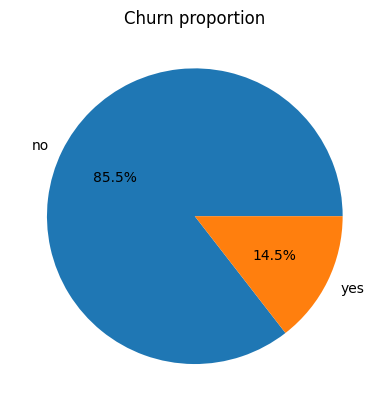

In [11]:
churn_prop= telco.groupby('Churn').size().reset_index(name="count")
plt.pie(churn_prop['count'],labels=churn_prop.Churn,autopct='%1.1f%%')
plt.title('Churn proportion')
plt.show()    

In [12]:
print(telco.groupby('Churn').mean())

       Account_Length  Vmail_Message    Day_Mins    Eve_Mins  Night_Mins  \
Churn                                                                      
no         100.793684       8.604561  175.175754  199.043298  200.133193   
yes        102.664596       5.115942  206.914079  212.410145  205.231677   

       Intl_Mins  CustServ_Calls   Day_Calls  Day_Charge   Eve_Calls  \
Churn                                                                  
no     10.158877        1.449825  100.283158   29.780421  100.038596   
yes    10.700000        2.229814  101.335404   35.175921  100.561077   

       Eve_Charge  Night_Calls  Night_Charge  Intl_Calls  Intl_Charge  
Churn                                                                  
no      16.918909   100.058246      9.006074    4.532982     2.743404  
yes     18.054969   100.399586      9.235528    4.163561     2.889545  


C:\Users\THE_DE_V_IL\AppData\Local\Temp\ipykernel_7836\3139912408.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(telco.groupby('Churn').mean())


In [13]:
print(telco.groupby('Churn').std())

       Account_Length  Vmail_Message   Day_Mins   Eve_Mins  Night_Mins  \
Churn                                                                    
no           39.88235      13.913125  50.181655  50.292175   51.105032   
yes          39.46782      11.860138  68.997792  51.728910   47.132825   

       Intl_Mins  CustServ_Calls  Day_Calls  Day_Charge  Eve_Calls  \
Churn                                                                
no      2.784489        1.163883  19.801157    8.530835  19.958414   
yes     2.793190        1.853275  21.582307   11.729710  19.724711   

       Eve_Charge  Night_Calls  Night_Charge  Intl_Calls  Intl_Charge  
Churn                                                                  
no       4.274863    19.506246      2.299768    2.441984     0.751784  
yes      4.396762    19.950659      2.121081    2.551575     0.754152  


C:\Users\THE_DE_V_IL\AppData\Local\Temp\ipykernel_7836\3060445367.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(telco.groupby('Churn').std())


# DATA VISUALIZATION USING SEABORN

In [14]:
import seaborn as sns

#### daily calls   

C:\Users\THE_DE_V_IL\AppData\Local\Temp\ipykernel_7836\1698074751.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco['Day_Mins'])


<AxesSubplot: xlabel='Day_Mins', ylabel='Density'>

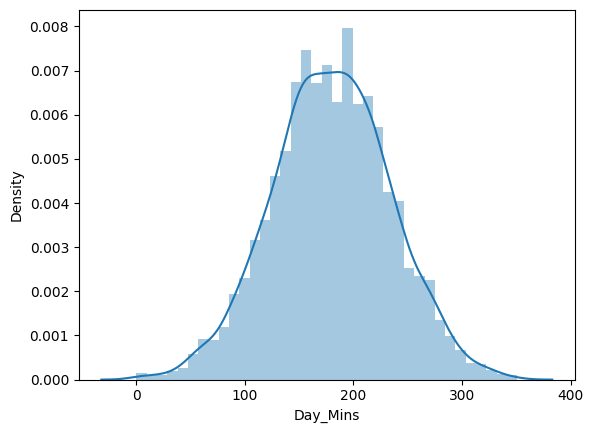

In [15]:
sns.distplot(telco['Day_Mins'])

C:\Users\THE_DE_V_IL\AppData\Local\Temp\ipykernel_7836\1085112728.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco['Eve_Mins'])


<AxesSubplot: xlabel='Eve_Mins', ylabel='Density'>

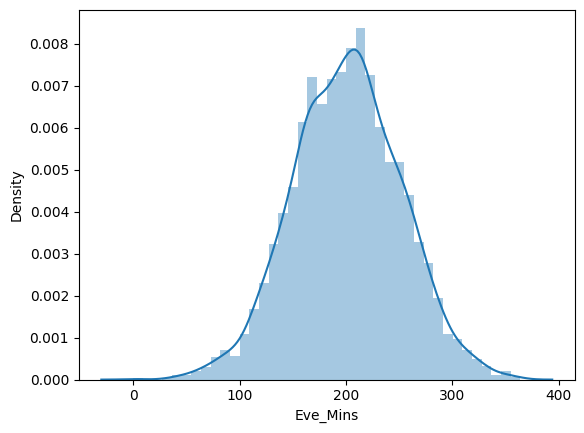

In [16]:
sns.distplot(telco['Eve_Mins'])

C:\Users\THE_DE_V_IL\AppData\Local\Temp\ipykernel_7836\1117512033.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco['Night_Mins'])


<AxesSubplot: xlabel='Night_Mins', ylabel='Density'>

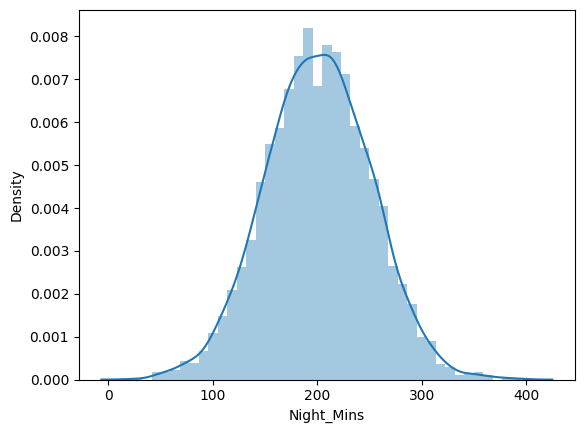

In [17]:
sns.distplot(telco['Night_Mins'])

C:\Users\THE_DE_V_IL\AppData\Local\Temp\ipykernel_7836\3673057908.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco['Intl_Mins'])


<AxesSubplot: xlabel='Intl_Mins', ylabel='Density'>

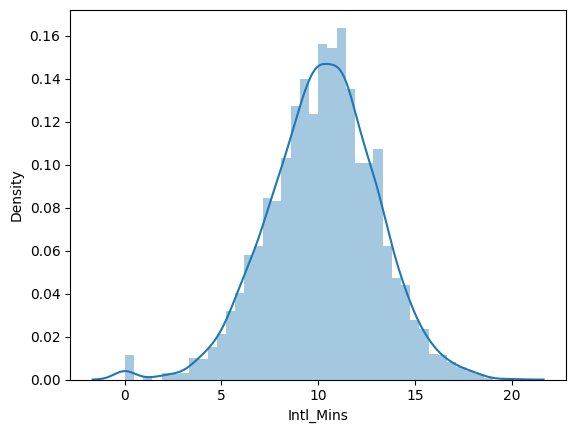

In [18]:
sns.distplot(telco['Intl_Mins'])

In [19]:
# the values are normally distributed

## Churn and plans - box plot

<AxesSubplot: xlabel='Churn', ylabel='CustServ_Calls'>

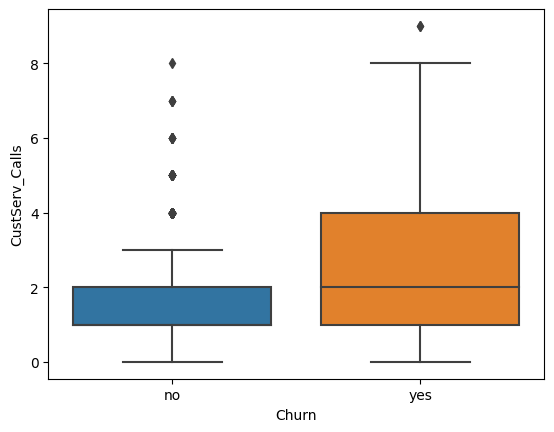

In [20]:
sns.boxplot( x ='Churn',
            y ='CustServ_Calls',
            data=telco)

In [21]:
# many outliers are present in customers who stood

<AxesSubplot: xlabel='Churn', ylabel='CustServ_Calls'>

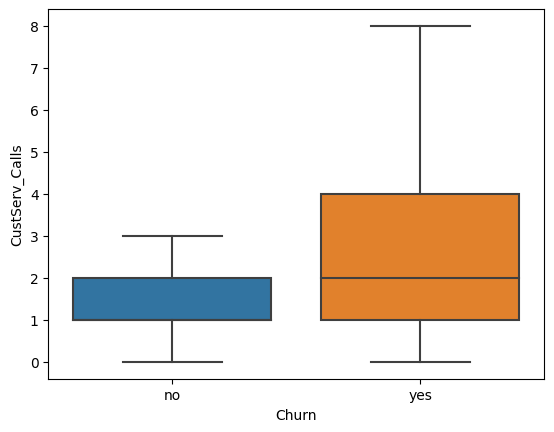

In [22]:
sns.boxplot( x ='Churn',
            y ='CustServ_Calls',
            data=telco,
            sym='')

<AxesSubplot: xlabel='Churn', ylabel='CustServ_Calls'>

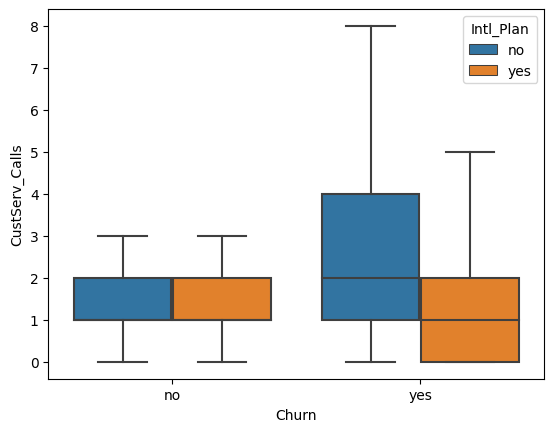

In [23]:
sns.boxplot( x ='Churn',
            y ='CustServ_Calls',
            data=telco,
            sym='',
            hue='Intl_Plan')

In [24]:
# wow thats lot of difference aint it   


# encoding binary features

In [25]:
# encoding is required for the machine learning process

In [26]:
telco['Intl_Plan']= telco['Intl_Plan'].replace({ 'yes':1, 'no':0})
telco['Churn']= telco['Churn'].replace({ 'yes':1, 'no':0})
telco['Vmail_Plan']=telco['Vmail_Plan'].replace({'yes':1,'no':0})

In [27]:
telco['Intl_Plan']

0       0
1       0
2       0
3       1
4       1
       ..
3328    0
3329    0
3330    0
3331    1
3332    0
Name: Intl_Plan, Length: 3333, dtype: int64

 # Feature scaling 

In [28]:
import sklearn

In [29]:
from sklearn.preprocessing import StandardScaler

#### Create a dataframe that uses these two columns

In [30]:
telco_float = telco[['Intl_Calls', 'Night_Mins']]

telco_float

,Intl_Calls,Night_Mins
0,3,244.7
1,3,254.4
2,5,162.6
3,7,196.9
4,3,186.9
...,...,...
3328,6,279.1
3329,4,191.3
3330,6,191.9
3331,10,139.2


In [31]:
telco_scale=StandardScaler().fit_transform(telco_float)


In [32]:

telco_scale_df=pd.DataFrame(telco_scale,columns=['Intl_Calls','Night_Mins'])
telco_scale_df.describe()

,Intl_Calls,Night_Mins
count,3.333000e+03,3.333000e+03
mean,-8.527366e-18,7.887813e-17
std,1.000150e+00,1.000150e+00
min,-1.820289e+00,-3.513648e+00
25%,-6.011951e-01,-6.698545e-01
50%,-1.948306e-01,6.485803e-03
75%,6.178983e-01,6.808485e-01
max,6.307001e+00,3.839081e+00


## Feature engineering

In [33]:
telco['Avg_Night_Calls'] = telco.Night_Calls/telco.Night_Mins 

In [34]:
telco['Avg_Day_Calls'] = telco.Day_Calls/telco.Day_Mins

In [35]:
telco['Avg_Eve_Calls'] = telco.Eve_Calls/telco.Eve_Mins

In [36]:
telco['Intl_Calls']= telco.Intl_Calls/telco.Intl_Mins

In [37]:
telco

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Avg_Night_Calls,Avg_Day_Calls,Avg_Eve_Calls
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,0.300000,2.70,0.371884,0.414938,0.501520
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,0.218978,3.70,0.404874,0.761139,0.526854
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,0.409836,3.29,0.639606,0.468365,0.907591
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,1.060606,1.78,0.452006,0.237141,1.421648
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,0.297030,2.73,0.647405,0.677864,0.822657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,215.5,279.1,9.9,2,0,0,1,...,26.55,126,18.32,83,12.56,0.606061,2.67,0.297384,0.492958,0.584687
3329,68,0,231.1,153.4,191.3,9.6,3,0,0,0,...,39.29,55,13.04,123,8.61,0.416667,2.59,0.642969,0.246646,0.358540
3330,28,0,180.8,288.8,191.9,14.1,2,0,0,0,...,30.74,58,24.55,91,8.64,0.425532,3.81,0.474205,0.602876,0.200831
3331,184,0,213.8,159.6,139.2,5.0,2,0,1,0,...,36.35,84,13.57,137,6.26,2.000000,1.35,0.984195,0.491113,0.526316


In [38]:
data= telco.copy()


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Account_Length   3333 non-null   int64  
 1   Vmail_Message    3333 non-null   int64  
 2   Day_Mins         3333 non-null   float64
 3   Eve_Mins         3333 non-null   float64
 4   Night_Mins       3333 non-null   float64
 5   Intl_Mins        3333 non-null   float64
 6   CustServ_Calls   3333 non-null   int64  
 7   Churn            3333 non-null   int64  
 8   Intl_Plan        3333 non-null   int64  
 9   Vmail_Plan       3333 non-null   int64  
 10  Day_Calls        3333 non-null   int64  
 11  Day_Charge       3333 non-null   float64
 12  Eve_Calls        3333 non-null   int64  
 13  Eve_Charge       3333 non-null   float64
 14  Night_Calls      3333 non-null   int64  
 15  Night_Charge     3333 non-null   float64
 16  Intl_Calls       3315 non-null   float64
 17  Intl_Charge   

# Churn prediction

### Logistic regression


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X= data.drop('Churn',axis=1)
y= data.Churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ) 


In [42]:
print(X_test.isna().sum())


Account_Length      0
Vmail_Message       0
Day_Mins            0
Eve_Mins            0
Night_Mins          0
Intl_Mins           0
CustServ_Calls      0
Intl_Plan           0
Vmail_Plan          0
Day_Calls           0
Day_Charge          0
Eve_Calls           0
Eve_Charge          0
Night_Calls         0
Night_Charge        0
Intl_Calls         10
Intl_Charge         0
Avg_Night_Calls     0
Avg_Day_Calls       1
Avg_Eve_Calls       0
dtype: int64


In [43]:
X_train=X_train.fillna(method='ffill')

# scores

In [44]:
X_test=X_test.fillna(method='ffill')

In [45]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train,y_train)

# Compute accuracy
print(clf.score(X_test, y_test))

0.934


In [46]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)

# Calculate the classification report
cr = classification_report(y_test, y_pred)

# Print the classification report
print(cr)


[[842  12]
 [ 54  92]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       854
           1       0.88      0.63      0.74       146

    accuracy                           0.93      1000
   macro avg       0.91      0.81      0.85      1000
weighted avg       0.93      0.93      0.93      1000



In [47]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [48]:
recall_score(y_test, y_pred)


0.6301369863013698

In [49]:
precision_score(y_test, y_pred)

0.8846153846153846

# roc_curve

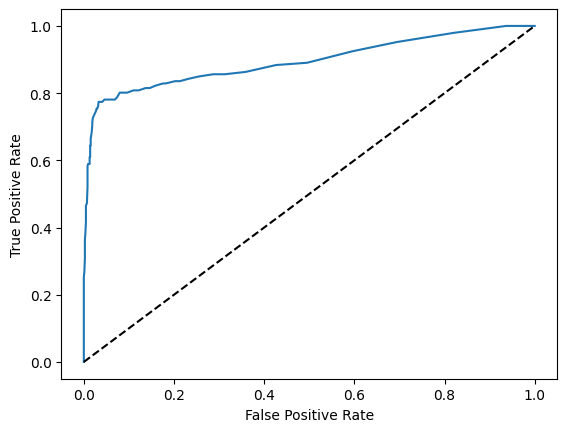

In [50]:
    # Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Import roc_curve
from sklearn.metrics import roc_curve

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr,tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

In [51]:

# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Print the AUC
print(roc_auc_score(y_test,y_pred_prob))

0.8942566808892882


In [52]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.736

In [54]:
X=X.fillna(method='ffill')

In [55]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
# Create the hyperparameter grid
param_grid = {'max_features': ['auto', 'sqrt', 'log2']}

# Call GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=3)

# Fit the model
grid_search.fit(X, y)

# Print the optimal parameters
print(grid_search.best_params_)

c:\Users\THE_DE_V_IL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\THE_DE_V_IL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\THE_DE_V_IL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past b

{'max_features': 'log2'}


In [56]:
# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Create the hyperparameter grid
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_dist, cv=3)

# Fit the model
random_search.fit(X,y)
# Print best parameters
print(random_search.best_params_)

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 8}


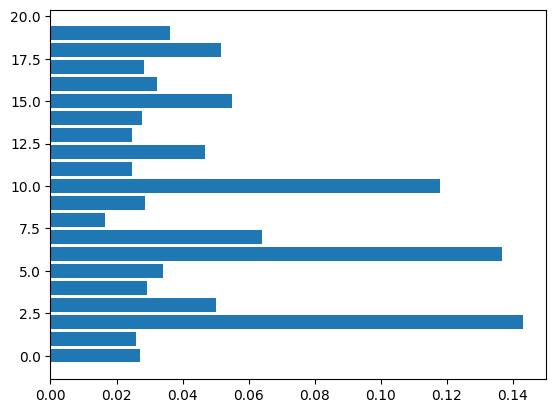

In [57]:
# Calculate feature importances
importances = clf.feature_importances_

# Create plot
plt.barh(range(X.shape[1]), importances)
plt.show()

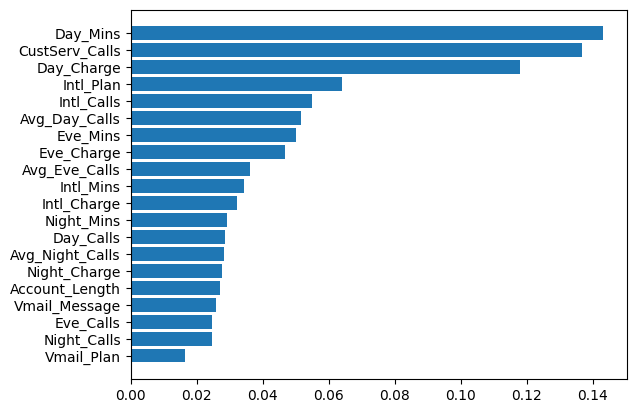

In [58]:
# Sort importances
sorted_index = np.argsort(importances)

# Create labels
labels = X.columns[sorted_index]

# Clear current plot
plt.clf()

# Create plot
plt.barh(range(X.shape[1]), importances[sorted_index], tick_label=labels)
plt.show()

In [59]:
data.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Avg_Night_Calls,Avg_Day_Calls,Avg_Eve_Calls
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,0.300000,2.70,0.371884,0.414938,0.501520
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,0.218978,3.70,0.404874,0.761139,0.526854
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,0.409836,3.29,0.639606,0.468365,0.907591
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,1.060606,1.78,0.452006,0.237141,1.421648
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,0.297030,2.73,0.647405,0.677864,0.822657


In [60]:
data['Total_charge']= data['Intl_Charge'] + data['Eve_Charge'] + data['Night_Charge'] + data['Day_Charge']
data['Total_mins']= data['Intl_Mins'] + data['Eve_Mins'] + data['Night_Mins'] + data['Day_Mins']
data['Total_Calls']= data['Intl_Calls'] + data['Eve_Calls'] + data['Night_Calls'] + data['Day_Calls']
data['Min_Calls']= data['Total_Calls']/data['Total_mins']
data['Cost_call']=data['Total_charge']/data['Total_mins']

In [61]:
data=data.dropna(axis=0)

In [62]:
data.isnull().sum()

Account_Length     0
Vmail_Message      0
Day_Mins           0
Eve_Mins           0
Night_Mins         0
Intl_Mins          0
CustServ_Calls     0
Churn              0
Intl_Plan          0
Vmail_Plan         0
Day_Calls          0
Day_Charge         0
Eve_Calls          0
Eve_Charge         0
Night_Calls        0
Night_Charge       0
Intl_Calls         0
Intl_Charge        0
Avg_Night_Calls    0
Avg_Day_Calls      0
Avg_Eve_Calls      0
Total_charge       0
Total_mins         0
Total_Calls        0
Min_Calls          0
Cost_call          0
dtype: int64

In [63]:
X= data.drop('Churn',axis=1)
y= data.Churn

In [64]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the data
clf.fit(X_train, y_train)

# Print the accuracy
print(clf.score(X_test,y_test))

0.9738430583501007


In [65]:
y_pred=clf.predict(X_test)
f1_score(y_test,y_pred)

0.8968253968253969

In [66]:
confusion_matrix(y_test, y_pred)

array([[855,   0],
       [ 26, 113]], dtype=int64)

In [67]:

cr=classification_report(y_test, y_pred)
print(cr)


              precision    recall  f1-score   support

           0       0.97      1.00      0.99       855
           1       1.00      0.81      0.90       139

    accuracy                           0.97       994
   macro avg       0.99      0.91      0.94       994
weighted avg       0.97      0.97      0.97       994



Precision: The precision for the positive class (customer churn = 1) is 0.99. This means that out of all the samples that the model predicted as positive, 99% of them were actually positive (i.e., true positives), and only 1% were false positives.

Recall: The recall for the positive class is 0.79. This means that out of all the actual positive samples, the model correctly identified 79% of them (i.e., true positives), while 21% were false negatives (i.e., actual positive samples that the model predicted as negative).

F1-score: The F1-score is a weighted harmonic mean of precision and recall, with equal weightage given to both metrics. The F1-score for the positive class is 0.88, which indicates a good balance between precision and recall.
this is great score overall